# Exercises from Intro to Statistics and Data Analysis

## Exercise 1.1

The following measurements were recorded for the drying time, in hours, of a certain brand of latex paint:

```
3.4 2.5 4.8 2.9 3.6
2.8 3.3 5.6 3.7 2.8
4.4 4.0 5.2 3.0 4.8
```

Assume that the measurements are a simple random sample.

1. What is the sample size for the above sample?
2. Calculate the sample mean
3. Calculate the sample median
4. Plot the data by way of a dot plot
5. Compute the 20% trimmed mean for the above data set
6. Is the sample mean for these data more or less descriptive as a center of location than the trimmed mean?

The answers to 1, 2, 3, and 5 are trivial once we have the functions in place:

In [1]:
from libs.stats import sample_mean, sample_median, trimmed_mean

data_set = [3.4, 2.5, 4.8, 2.9, 3.6, 2.8, 3.3, 5.6, 3.7, 2.8, 4.4, 4.0, 5.2, 3.0, 4.8]

print(f"sample size={len(data_set)}")
print(f"sample mean={round(sample_mean(data_set), 3)}")
print(f"sample median={round(sample_median(data_set), 3)}")
print(f"trimmed mean(20%)={round(trimmed_mean(data_set, 20), 3)}")


sample size=15
sample mean=3.787
sample median=3.6
trimmed mean(20%)=3.678


Matplotlib does not provide OOB support for dot plots, so we have to tweak the scatter plot to provide something that looks like a dot plot.

Note that the steps needed for creating the dot plot could be automated a little bit, but not sure if it is worth the effort.

(2.5, 5.6)
(0, 0.25)


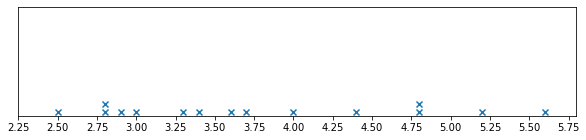

In [2]:
import matplotlib.pyplot as plt
import numpy as np


def get_ys_for_dot_plot(*xs, skew=0.25):
    freq_map = {}
    ys = []
    for x in xs:
        y = []
        for value in x:
            if value in freq_map:
                freq_map[value] = freq_map[value] + skew
            else:
                freq_map[value] = 0
            y.append(freq_map[value])
        ys.append(y)
    return ys

def get_limits(*data_sets):
    mins = [min(data_set) for data_set in data_sets]
    maxs = [max(data_set) for data_set in data_sets]
    return (min(mins), max(maxs))

dataset_dots_y = get_ys_for_dot_plot(data_set)


print(get_limits(data_set))
print(get_limits(*dataset_dots_y))

plt.xlim(2.25, 5.80)
plt.ylim(-0.1, 3)

plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_ticks(np.arange(2.25, 5.80, 0.25))
plt.scatter(data_set, dataset_dots_y[0], marker='x')
plt.gcf().set_size_inches(10, 2) # gcf stands for get current figure


Thus, the solutions are:
1. 15
2. 3.787
3. 3.6
4. See image above
5. 3.678
6. We see in the results that the trimmed mean is closer to the median than the sample mean, which indicates that we have a few outliers. As conclusion, the trimmed mean gives us a better indication of the center that the sample mean.

## Exercise 1.2

An important property of a fiber is its water absorbency. A random sample of 20 pieces of cotton fiber was taken and its absorbency was measured.

The obtained absorbency values were:

```
18.71 21.41 20.72 21.81 19.29 22.43 20.17
23.71 19.44 20.50 18.92 20.33 23.00 22.85
19.25 21.77 22.11 19.77 18.04 21.12
```

1. Calculate the sample mean and median for the above sample values.
2. Compute the 10% trimmed mean
3. Do a dot plot of the absorbency data
4. Using only the values of the mean, median, and trimmed mean, do you have evidence of outliers in the data?

Solutions to 1, 2 are immediate with the functions in place:

In [3]:
from libs.stats import sample_mean, sample_median, trimmed_mean

data_set = [
    18.71, 21.41, 20.72, 21.81, 19.29, 22.43, 20.17, 
    23.71, 19.44, 20.50, 18.92, 20.33, 23.00, 22.85,
    19.25, 21.77, 22.11, 19.77, 18.04, 21.12]

print(f"sample size={len(data_set)}")
print(f"sample mean={round(sample_mean(data_set), 5)}")
print(f"sample median={round(sample_median(data_set), 5)}")
print(f"trimmed mean(10%)={round(trimmed_mean(data_set, 10), 5)}")

sample size=20
sample mean=20.7675
sample median=20.61
trimmed mean(10%)=20.74313


For the dot plot, I use the semi-automated approach as there's no dot plot support out of the box in matplotlib:

(18.04, 23.71)
(0, 0)


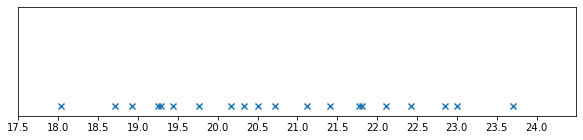

In [4]:
import matplotlib.pyplot as plt
import numpy as np


def get_ys_for_dot_plot(*xs, skew=0.25):
    freq_map = {}
    ys = []
    for x in xs:
        y = []
        for value in x:
            if value in freq_map:
                freq_map[value] = freq_map[value] + skew
            else:
                freq_map[value] = 0
            y.append(freq_map[value])
        ys.append(y)
    return ys

def get_limits(*data_sets):
    mins = [min(data_set) for data_set in data_sets]
    maxs = [max(data_set) for data_set in data_sets]
    return (min(mins), max(maxs))

dataset_dots_y = get_ys_for_dot_plot(data_set)


# this gives you the min and max for the x and y coordinates
print(get_limits(data_set))
print(get_limits(*dataset_dots_y))

plt.xlim(17.5, 24.5)
plt.ylim(-0.1, 1)

plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_ticks(np.arange(17.5, 24.5, 0.5))
plt.scatter(data_set, dataset_dots_y[0], marker='x')
plt.gcf().set_size_inches(10, 2) # gcf stands for get current figure

Thus:
1. mean = 20.7675, median = 20.61
2. trimmed mean (10%) = 20.74313
3. See the chart above
4. There does not seem to be a lot of variability in the sample because the median is close to the mean, and the trimmed mean is very close to the mean.

## Exercise 1.3

A comparative study is carried out on a certain polymer used for aircraft. Certain material items are subjected to aging tests and then compared with some other material items that had not subjected to those tests.

The following data were recorded out of these tests:

| | |
| :- | :- |
| No aging | 227 222 218 217 225 218 216 229 228 221 |
| Aging | 219 214 215 211 209 218 203 204 201 205 |

1. Do a plot of the data
2. From your plot, does it appear as if the aging process has had an effect on the tensile strength of this material? Explain
3. Calculate the sample mean of the two samples
4. Calculate the median for both. Discuss the similarity or lack of similarity between the mean and median of each group.

Let's do the plot first, this time taking into account that we have two separate data sets to plot:

(201, 229)
(0, 0.5)


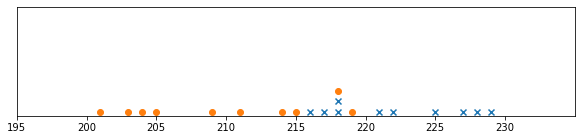

In [5]:
import matplotlib.pyplot as plt
import numpy as np


def get_ys_for_dot_plot(*xs, skew=0.25):
    freq_map = {}
    ys = []
    for x in xs:
        y = []
        for value in x:
            if value in freq_map:
                freq_map[value] = freq_map[value] + skew
            else:
                freq_map[value] = 0
            y.append(freq_map[value])
        ys.append(y)
    return ys

def get_limits(*data_sets):
    mins = [min(data_set) for data_set in data_sets]
    maxs = [max(data_set) for data_set in data_sets]
    return (min(mins), max(maxs))

no_aging_data_set = [227, 222, 218, 217, 225, 218, 216, 229, 228, 221]
aging_data_set = [219, 214, 215, 211, 209, 218, 203, 204, 201, 205]

datasets_dots_y = get_ys_for_dot_plot(no_aging_data_set, aging_data_set)


# this gives you the min and max for the x and y coordinates
print(get_limits(no_aging_data_set, aging_data_set))
print(get_limits(*datasets_dots_y))

plt.xlim(195, 235)
plt.ylim(-0.1, 2.5)

plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_ticks(np.arange(195, 235, 5))
plt.scatter(no_aging_data_set, datasets_dots_y[0], marker='x')
plt.scatter(aging_data_set, datasets_dots_y[1], marker='o')

plt.gcf().set_size_inches(10, 2) # gcf stands for get current figure

From looking at the data we see that the materials subjected to aging are placed to the left, while the material that has been kept untouched is placed to the right.

Now, let's calculate the mean and median for both datasets.

In [6]:
from libs.stats import sample_mean, sample_median, trimmed_mean

no_aging_data_set = [227, 222, 218, 217, 225, 218, 216, 229, 228, 221]
aging_data_set = [219, 214, 215, 211, 209, 218, 203, 204, 201, 205]

print("==== no aging")
print(f"sample mean={round(sample_mean(no_aging_data_set), 2)}")
print(f"sample median={round(sample_median(no_aging_data_set), 2)}")

print("\n==== no aging")
print(f"sample mean={round(sample_mean(aging_data_set), 2)}")
print(f"sample median={round(sample_median(aging_data_set), 2)}")



==== no aging
sample mean=222.1
sample median=221.5

==== no aging
sample mean=209.9
sample median=210.0


## Exercise 1.4

The following data sets measure the flexibility of two steel rods provided by two different companies.

|    |    |
| :- | :- |
| Company A | 9.3 8.8 6.8 8.7 8.5 6.7 8.0 6.5 9.2 7.0 |
| Company B | 11.0 9.8 9.9 10.2 10.1 9.7 11.0 11.1 10.2 9.6 |

1. Calculate the sample mean and median for the data for the two companies.
2. Plot the data for the two companies on the same line and give your impressions regarding any apparent differences between the two companyies' products.

(6.5, 11.1)
(0, 0.25)


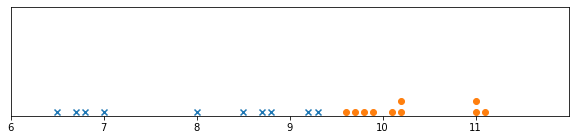

In [7]:
import matplotlib.pyplot as plt
import numpy as np


def get_ys_for_dot_plot(*xs, skew=0.25):
    freq_map = {}
    ys = []
    for x in xs:
        y = []
        for value in x:
            if value in freq_map:
                freq_map[value] = freq_map[value] + skew
            else:
                freq_map[value] = 0
            y.append(freq_map[value])
        ys.append(y)
    return ys

def get_limits(*data_sets):
    mins = [min(data_set) for data_set in data_sets]
    maxs = [max(data_set) for data_set in data_sets]
    return (min(mins), max(maxs))

company_a_data_set = [9.3, 8.8, 6.8, 8.7, 8.5, 6.7, 8.0, 6.5, 9.2, 7.0]
company_b_data_set = [11.0, 9.8, 9.9, 10.2, 10.1, 9.7, 11.0, 11.1, 10.2, 9.6]
data_sets = [company_a_data_set, company_b_data_set]

datasets_dots_y = get_ys_for_dot_plot(*data_sets)


# this gives you the min and max for the x and y coordinates
print(get_limits(*data_sets))
print(get_limits(*datasets_dots_y))

# limits are 6.5 and 11.1, we stretch them a little bit for cosmetic reasons
plt.xlim(6, 12)

# there are a few clashes so we need to expand the y-axis
plt.ylim(-0.1, 2.5)

plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_ticks(np.arange(6, 12, 1))
plt.scatter(data_sets[0], datasets_dots_y[0], marker='x')
plt.scatter(data_sets[1], datasets_dots_y[1], marker='o')

plt.gcf().set_size_inches(10, 2) # gcf stands for get current figure

We can resolve that company A's product are less flexible that company B's products.

In [8]:
from libs.stats import sample_mean, sample_median

company_a_data_set = [9.3, 8.8, 6.8, 8.7, 8.5, 6.7, 8.0, 6.5, 9.2, 7.0]
company_b_data_set = [11.0, 9.8, 9.9, 10.2, 10.1, 9.7, 11.0, 11.1, 10.2, 9.6]

print("==== company A")
print(f"sample mean={round(sample_mean(company_a_data_set), 3)}")
print(f"sample median={round(sample_median(company_a_data_set), 3)}")

print("\n==== company B")
print(f"sample mean={round(sample_mean(company_b_data_set), 3)}")
print(f"sample median={round(sample_median(company_b_data_set), 3)}")

==== company A
sample mean=7.95
sample median=8.25

==== company B
sample mean=10.26
sample median=10.15


We can conclude that not only Company B's products have more flexibility, but also more consistent flexibility than Company A's (as mean and median are closer).

## Exercise 1.5

20 adults participated in a study to evaluate the effect of a specific healt regimen on blood cholesterols. Ten were randomly selected to be a control group, and ten others were assigned to take part in the regimen as the treatment group for a period of 6 months.

The following data show the reduction of cholesterol experienced for the time period for the 20 subjects.

|    |    |
| :- | :- |
| Control group | 7 3 -4 14 2 5 22 -7 9 5 |
| Treatment group | -6 5 9 4 4 12 37 5 3 3 |

1. Do a dot plot of the data for both groups in the same graph.
2. Compute the mean, median, and 10% trimmed mean for both groups
3. Explain why the difference in means suggests one conclusion about the effect of the regimen, while the difference in medians or trimmed means suggest a different conclusion.

Let's start with the dot plot, using our semi-automated way consisting of:
+ Set up the datasets for both groups
+ Get the min/max of the data to get the limits for x-axis
+ Find a way to skew the data collisions so that they're visible in the plot by adjusting y coordinates of clashing values.
+ Find the min/max of those y coordinates to get the limits for y-axis.
+ Manually adjust the limits for the x-axis in the chart given a little bit of padding left and right.
+ Manually adjust the y-axis limit in the chart so that it looks like a proper dot plot.
+ Finally, plot the data as scatter plots, with different markers for each individual data set.

Let's start by defining the data sets for both groups, which we keep in a list of lists for convenience.

In [9]:
control_grp_dataset = [7, 3, -4, 14, 2, 5, 22, -7, 9, 5]
treatment_grp_dataset = [-6, 5, 9, 4, 4, 12, 37, 5, 3, 3]
data_sets = [control_grp_dataset, treatment_grp_dataset]

Now, we define the function `get_limits()` that will give us the min and max values across all the data in the different data_sets.

This function will be used for helping us get the limits for the x- and y- axis.

In [10]:
def get_limits(*data_sets):
    mins = [min(data_set) for data_set in data_sets]
    maxs = [max(data_set) for data_set in data_sets]
    return (min(mins), max(maxs))

Now, we define the function the displaces a little bit the y coordinates of the dots when there are clashes.

The idea is that if we find several dots with the same value, we move them up by a certain value. By default, the y coordinates for the dots will be zero.

In [11]:
def get_ys_for_dot_plot(*xs, skew=0.25):
    freq_map = {}
    ys = []
    for x in xs:
        y = []
        for value in x:
            if value in freq_map:
                freq_map[value] = freq_map[value] + skew
            else:
                freq_map[value] = 0
            y.append(freq_map[value])
        ys.append(y)
    return ys

Now, we can use both functions to get the limits:

In [12]:
datasets_dots_y = get_ys_for_dot_plot(*data_sets)

print(get_limits(*data_sets))
print(get_limits(*datasets_dots_y))

(-7, 37)
(0, 0.75)


Now we know the ranges of the data to plot, and we can adjust them a little bit for a better presentation of the data.

The approach is to add a little bit of padding from the known limits. The actual amount depends on the *scale* of the data. For instance in this case, x_min = -10, x_max = 40 seems like good values.

The ticks also needs to be adjusted, so that the labels don't feel too cluttered or too separated:

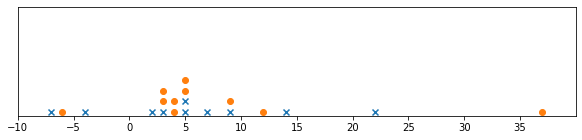

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x_min = -10
x_max = 40
tick_step = 5

plt.xlim(x_min, x_max)

# there are a few clashes so we need to expand the y-axis
plt.ylim(-0.1, 2.5)

plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_ticks(np.arange(x_min, x_max, tick_step))
plt.scatter(data_sets[0], datasets_dots_y[0], marker='x')
plt.scatter(data_sets[1], datasets_dots_y[1], marker='o')

plt.gcf().set_size_inches(10, 2) # gcf stands for get current figure

Let's now compute the mean, median, and 10% trimmed mean for both groups:

In [14]:
from libs.stats import sample_mean, sample_median, trimmed_mean

print("==== control group")
print(f"sample mean={round(sample_mean(control_grp_dataset), 2)}")
print(f"sample median={round(sample_median(control_grp_dataset), 2)}")
print(f"trimmed mean (10%)={round(trimmed_mean(control_grp_dataset, pct=10), 2)}")

print("\n==== treatment group")
print(f"sample mean={round(sample_mean(treatment_grp_dataset), 2)}")
print(f"sample median={round(sample_median(treatment_grp_dataset), 2)}")
print(f"trimmed mean (10%)={round(trimmed_mean(treatment_grp_dataset, pct=10), 2)}")

==== control group
sample mean=5.6
sample median=5.0
trimmed mean (10%)=5.12

==== treatment group
sample mean=7.6
sample median=4.5
trimmed mean (10%)=5.62


Therefore:
1. See chart above
2. See data above.
3. While the mean for the treatment group is larger, if you exclude the outliers it is pretty much aligned. The median for the treatment group is a bit smaller, but not significantly.

## Exercise 1.6

The data below show the strength values for a material that has been cured using two different temperatures (20°C and 45°C).

|    |    |
| :- | :- |
| 20°C | 2.07 2.14 2.22 2.03 2.21 2.03 2.05 2.18 2.09 2.14 2.11 2.02 |
| 45°C | 2.52 2.15 2.49 2.03 2.37 2.05 1.99 2.42 2.08 2.42 2.29 2.01 |

1. Show a dot plot of the data for both groups
2. Compute the sample mean strength for both samples
3. Does it appear as if temperature has an influence on tensile strength based in the plot?
4. Does anything else appear to be influenced by an increase in curing temperature? Explain.


Let's start with the dot plot, this time without going into as much detail as we did in the prev exercise:

(1.99, 2.52)
(0, 0.5)


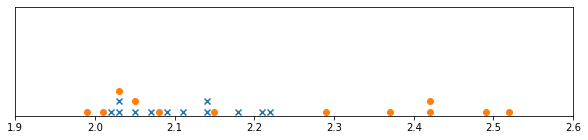

In [15]:
import matplotlib.pyplot as plt
import numpy as np


def get_ys_for_dot_plot(*xs, skew=0.25):
    freq_map = {}
    ys = []
    for x in xs:
        y = []
        for value in x:
            if value in freq_map:
                freq_map[value] = freq_map[value] + skew
            else:
                freq_map[value] = 0
            y.append(freq_map[value])
        ys.append(y)
    return ys

def get_limits(*data_sets):
    mins = [min(data_set) for data_set in data_sets]
    maxs = [max(data_set) for data_set in data_sets]
    return (min(mins), max(maxs))

twenty_deg_data_set = [2.07, 2.14, 2.22, 2.03, 2.21, 2.03, 2.05, 2.18, 2.09, 2.14, 2.11, 2.02]
fourty_five_deg_data_set = [2.52, 2.15, 2.49, 2.03, 2.37, 2.05, 1.99, 2.42, 2.08, 2.42, 2.29, 2.01]
data_sets = [twenty_deg_data_set, fourty_five_deg_data_set]

datasets_dots_y = get_ys_for_dot_plot(*data_sets)


# this gives you the min and max for the x and y coordinates
print(get_limits(*data_sets))
print(get_limits(*datasets_dots_y))

# limits are 1.99 and 2.52, we add a little padding for cosmetic reasons
x_lim_left = 1.90
x_lim_right = 2.60
plt.xlim(x_lim_left, x_lim_right)

# there are a few clashes so we need to expand the y-axis
plt.ylim(-0.1, 2.5)

plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_ticks(np.arange(x_lim_left, x_lim_right, 0.1))
plt.scatter(data_sets[0], datasets_dots_y[0], marker='x')
plt.scatter(data_sets[1], datasets_dots_y[1], marker='o')

plt.gcf().set_size_inches(10, 2) # gcf stands for get current figure

Now we compute the sample mean for both groups:

In [16]:
from libs.stats import sample_mean

print("==== 20°C")
print(f"sample mean={round(sample_mean(twenty_deg_data_set), 4)}")

print("\n==== 45°C")
print(f"sample mean={round(sample_mean(fourty_five_deg_data_set), 4)}")


==== 20°C
sample mean=2.1075

==== 45°C
sample mean=2.235


Let's analyze the results and provide some conclusions:

1. See plot above
2. Yes, looking at the plot and the mean we see that strength seems to improve when you use the 45°C treatment
3. Apart from increasing the strength, the 45°C seems to have an effect on the variability of the data (more dispersed), and there are sample for which the strength is less than the one found for 20°C samples.

## Exercise 1.7

Compute the sample variance and sample standard deviation for the data set in [Exercise 1.1](#exercise-11). Note that the values are hours.

```
3.4 2.5 4.8 2.9 3.6
2.8 3.3 5.6 3.7 2.8
4.4 4.0 5.2 3.0 4.8
```

In [17]:
from libs.stats import sample_variance, sample_standard_deviation

data_set = [3.4, 2.5, 4.8, 2.9, 3.6, 2.8, 3.3, 5.6, 3.7, 2.8, 4.4, 4.0, 5.2, 3.0, 4.8]

print(f"sample variance={round(sample_variance(data_set), 3)} hours^2")
print(f"sample std dev={round(sample_standard_deviation(data_set), 3)} hours")


sample variance=0.943 hours^2
sample std dev=0.971 hours


## Exercise 1.8

Compute the sample variance and standard deviation for the data of [Exercise 1.2](#exercise-12).

```
18.71 21.41 20.72 21.81 19.29 22.43 20.17
23.71 19.44 20.50 18.92 20.33 23.00 22.85
19.25 21.77 22.11 19.77 18.04 21.12
```

In [18]:
from libs.stats import sample_variance, sample_standard_deviation

data_set = [18.71, 21.41, 20.72, 21.81, 19.29, 22.43, 20.17, 
    23.71, 19.44, 20.50, 18.92, 20.33, 23.00, 22.85,
    19.25, 21.77, 22.11, 19.77, 18.04, 21.12]

print(f"sample variance={round(sample_variance(data_set), 4)} units^2")
print(f"sample std dev={round(sample_standard_deviation(data_set), 4)} units")


sample variance=2.5329 units^2
sample std dev=1.5915 units


## Exercise 1.9

[Exercise 1.3](#exercise-13) showed tensile strength data for two samples, one of which was exposed to an aging process, and one that wasn't.

| | |
| :- | :- |
| No aging | 227 222 218 217 225 218 216 229 228 221 |
| Aging | 219 214 215 211 209 218 203 204 201 205 |

1. Calculate the sample variance as well as standard deviation for both samples.
2. Does there appear to be any evidence that aging affects the variability in tensile strength?

As this one requires a little bit more explanation, it will make sense to redo the whole exercise to draw conclusions from the dot plot, the mean and median, and the std dev.

Let's put it all together, improving a little bit the dot plot as we need to make some analysis of it.

==== no aging
sample mean=222.1
sample median=221.5
sample variance=23.66
sample std dev=4.86

==== no aging
sample mean=209.9
sample median=210.0
sample variance=42.1
sample std dev=6.49


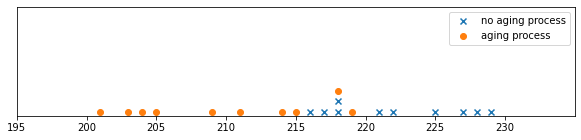

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from libs.stats import sample_mean, sample_median, trimmed_mean, sample_standard_deviation, sample_variance


def get_ys_for_dot_plot(*xs, skew=0.25):
    freq_map = {}
    ys = []
    for x in xs:
        y = []
        for value in x:
            if value in freq_map:
                freq_map[value] = freq_map[value] + skew
            else:
                freq_map[value] = 0
            y.append(freq_map[value])
        ys.append(y)
    return ys

def get_limits(*data_sets):
    mins = [min(data_set) for data_set in data_sets]
    maxs = [max(data_set) for data_set in data_sets]
    return (min(mins), max(maxs))

no_aging_data_set = [227, 222, 218, 217, 225, 218, 216, 229, 228, 221]
aging_data_set = [219, 214, 215, 211, 209, 218, 203, 204, 201, 205]

print("==== no aging")
print(f"sample mean={round(sample_mean(no_aging_data_set), 2)}")
print(f"sample median={round(sample_median(no_aging_data_set), 2)}")
print(f"sample variance={round(sample_variance(no_aging_data_set), 2)}")
print(f"sample std dev={round(sample_standard_deviation(no_aging_data_set), 2)}")

print("\n==== no aging")
print(f"sample mean={round(sample_mean(aging_data_set), 2)}")
print(f"sample median={round(sample_median(aging_data_set), 2)}")
print(f"sample variance={round(sample_variance(aging_data_set), 2)}")
print(f"sample std dev={round(sample_standard_deviation(aging_data_set), 2)}")


datasets_dots_y = get_ys_for_dot_plot(no_aging_data_set, aging_data_set)

fig, ax = plt.subplots()
plt.xlim(195, 235)
plt.ylim(-0.1, 2.5)

ax.scatter(no_aging_data_set, datasets_dots_y[0], marker='x', label="no aging process")
ax.scatter(aging_data_set, datasets_dots_y[1], marker='o', label="aging process")
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_ticks(np.arange(195, 235, 5))
ax.legend()
ax.grid(False)
fig.set_size_inches(10, 2)
plt.show()

The conclusion is the aging process, besides provoking a minor strength induces more variability in the measurements, which is not a good thing.

## Exercise 1.10

For the data of [Exercise 1.4](#exercise-14), compute boths the mean and the variance in flexibility for both datasets. Does there appear to be a difference in flexibility between company A and company B?

|    |    |
| :- | :- |
| Company A | 9.3 8.8 6.8 8.7 8.5 6.7 8.0 6.5 9.2 7.0 |
| Company B | 11.0 9.8 9.9 10.2 10.1 9.7 11.0 11.1 10.2 9.6 |

In [20]:
from libs.stats import sample_mean, sample_variance

company_a_data_set = [9.3, 8.8, 6.8, 8.7, 8.5, 6.7, 8.0, 6.5, 9.2, 7.0]
company_b_data_set = [11.0, 9.8, 9.9, 10.2, 10.1, 9.7, 11.0, 11.1, 10.2, 9.6]

print("==== company A")
print(f"sample mean={round(sample_mean(company_a_data_set), 3)}")
print(f"sample variance={round(sample_variance(company_a_data_set), 3)}")

print("\n==== company B")
print(f"sample mean={round(sample_mean(company_b_data_set), 3)}")
print(f"sample variance={round(sample_variance(company_b_data_set), 3)}")

==== company A
sample mean=7.95
sample variance=1.207

==== company B
sample mean=10.26
sample variance=0.325


As a conclusion, Company B's products are far less flexible and far less consistent.

## Exercise 1.11

Consider the data in [Exercise 1.5](#exercise-15). Compute the sample variance and sample standard deviation for both control and treatment groups.

|    |    |
| :- | :- |
| Control group | 7 3 -4 14 2 5 22 -7 9 5 |
| Treatment group | -6 5 9 4 4 12 37 5 3 3 |

In [21]:
from libs.stats import sample_variance, sample_standard_deviation

control_grp_dataset = [7, 3, -4, 14, 2, 5, 22, -7, 9, 5]
treatment_grp_dataset = [-6, 5, 9, 4, 4, 12, 37, 5, 3, 3]

print("==== control group")
print(f"sample variance={round(sample_variance(control_grp_dataset), 2)}")
print(f"sample standard deviation={round(sample_standard_deviation(control_grp_dataset), 2)}")

print("\n==== treatment group")
print(f"sample variance={round(sample_variance(treatment_grp_dataset), 2)}")
print(f"sample standard deviation={round(sample_standard_deviation(treatment_grp_dataset), 2)}")


==== control group
sample variance=69.38
sample standard deviation=8.33

==== treatment group
sample variance=128.04
sample standard deviation=11.32


## Exercise 1.12

For [Exercise 1.6](#exercise-16), compute the sample standard deviation in tensile strength for the samples separately for the two temperatures. Does it appear as if an increase in temperature influences the variability in tensile strength? Explain.


|    |    |
| :- | :- |
| 20°C | 2.07 2.14 2.22 2.03 2.21 2.03 2.05 2.18 2.09 2.14 2.11 2.02 |
| 45°C | 2.52 2.15 2.49 2.03 2.37 2.05 1.99 2.42 2.08 2.42 2.29 2.01 |

In [22]:
from libs.stats import sample_standard_deviation

twenty_deg_data_set = [2.07, 2.14, 2.22, 2.03, 2.21, 2.03, 2.05, 2.18, 2.09, 2.14, 2.11, 2.02]
fourty_five_deg_data_set = [2.52, 2.15, 2.49, 2.03, 2.37, 2.05, 1.99, 2.42, 2.08, 2.42, 2.29, 2.01]


print("==== 20°C")
print(f"sample std dev={round(sample_standard_deviation(twenty_deg_data_set), 4)}")

print("\n==== 45°C")
print(f"sample std dev={round(sample_standard_deviation(fourty_five_deg_data_set), 4)}")

==== 20°C
sample std dev=0.0709

==== 45°C
sample std dev=0.2032


As we can see from the results, the temperature greatly affects the variability in tensile strength.

## Exercise 1.13

A manufacturer of electronic components is interested in determining the lifetime of a certain type of battery.

A sample, in hour of life, is as follows:

```
123, 116, 122, 110, 175, 126, 125, 111, 118, 117
```

1. Find the sample mean and median.
2. What feature is this data set is responsible for the substantial difference between the two?

In [23]:
from libs.stats import sample_mean, sample_median

data_set = [123, 116, 122, 110, 175, 126, 125, 111, 118, 117]

print(f'sample mean={sample_mean(data_set)}')
print(f'sample median={sample_median(data_set)}')



sample mean=124.3
sample median=120.0


There's a significant different between the mean and the median because of the 175 value. If we calculate the 10% trimmed mean instead we get a closer value.

In [24]:
from libs.stats import trimmed_mean

print(f'trimmed mean(10%)={trimmed_mean(data_set, 10)}')

trimmed mean(10%)=119.75


## Exercise 1.14

A tire manufacturer wants to determine the inner diameter of a certain grade of tire. Ideally, the diameter would be 570 mm. The data are as follows:

```
572, 572, 573, 568, 569, 575, 565, 570
```

1. Find the sample mean and median.
2. Find the sample variance, standard deviation, and range.
3. Using the calculated statistics in (1) and (2), can you comment on the quality of the tires?

In [25]:
from libs.stats import sample_mean, sample_median, sample_variance, sample_standard_deviation, sample_range, pct_diff

data_set = [572, 572, 573, 568, 569, 575, 565, 570]

print(f'sample mean={sample_mean(data_set)} mm')
print(f'sample median={sample_median(data_set)} mm')
print(f'sample variance={sample_variance(data_set)} mm^2')
print(f'sample variance={sample_standard_deviation(data_set)} mm')
print(f'sample range={sample_range(data_set)}')
print(f'\npct_diff(mean, median)={pct_diff(sample_mean(data_set), sample_median(data_set))}')
print(f'\npct_diff(mean, median)={pct_diff(570, sample_mean(data_set))}')


sample mean=570.5 mm
sample median=571.0 mm
sample variance=10.0 mm^2
sample variance=3.1622776601683795 mm
sample range=10

pct_diff(mean, median)=0.0876424189307625

pct_diff(mean, median)=0.08771929824561403


The conclusion depends on the allowed error. For the me the mean and median are very close, which is confirmed by and standard deviation of only 3.16mm in the samples, and only 10 mm in the sample range.

The pct difference between the mean and median is only 0.09%, and the difference between the ideal result of 570mm and the mean is just 0.09 % bigger.

## Exercise 1.15

Five independent coin tosses result in H H H H H. It turns out that if the coin is fair, the probability of this outcome is $ \frac{1}{2}^5 = 0.03125 $.

Does this produce strong evidence that the coin is not fair?

There's 3% chance that out of 5 independent coin tosses you get all heads. Thus, although not very probable, it doesn't suggest in itself that the coin is not fair. You will need more coin tosses to give a valuable answer.

## Exercise 1.16

Show that the $ n $ pieces of information in $ \sum_{i=1}^{n} (x_i - \bar{x})^2 $ are not independent.

| HINT |
| :--- |
| You need to prove that $ \sum_{i=1}^{n} (x_i - \bar{x}) = 0 $. Use paper and pen for this one 😛|

$$
X = \{x_1, x_2, \ldots, x_n\} \\
\bar{x} = \sum_{i=1}^{n} \frac{x_1 + x_2 + \ldots + x_n}{n}\\
\\
\sum_{i=1}^{n} (x_i - \bar{x}) = \\
= x_1 - \frac{x_1 + x_2 + \ldots + x_n}{n} + x_2 - \frac{x_1 + x_2 + \ldots + x_n}{n} + \ldots + x_n - \frac{x_1 + x_2 + \ldots + x_n}{n} = \\
= \frac{n \cdot x_1 - (x_1 + x_2 + \ldots + x_n) + n \cdot x_2 - (x_1 + x_2 + \ldots + x_n) + \ldots + n \cdot x_n - (x_1 + x_2 + \ldots + x_n)}{n} = \\
= \frac{n \cdot x_1 + n \cdot x_2 + \ldots + n \cdot x_n - n \cdot (x_1 + x_2 + \ldots + x_n)}{n} = \\
= \frac{n \cdot (x_1 + x_2 + \ldots + x_n) - n \cdot (x_1 + x_2 + \ldots + x_n)}{n} = 0
$$

That's why it is said that a dataset $ X = \{x_1, x_2, \ldots, x_n\} $ has $ n - 1 $ degrees of freedom (and not $ n $).

## Exercise 1.17

A study of the effects of smoking on sleep patterns is conducted. The measre observed is the time in minutes that it takes to fall asleep.
The following data is obtained:

| Group | Time to fall asleep (min) |
| :---- | :------------------------ |
| Smokers | 69.3 56.0 22.1 47.6 53.2 48.1 52.7 34.4 60.2 43.8 23.2 13.8 |
| Nonsmokers | 28.6 25.1 26.4 34.9 29.8 28.4 38.5 30.2 30.6 31.8 41.6 21.1 36.0 37.9 13.9 |

1. Find the sample mean for each group
2. Find the sample standard deviation for each group
3. Make a dot plot of the data sets A and B on the same line
4. Comment on what kind of impact smoking appears to have on the time required to fall asleep.


In [26]:
from libs.stats import get_stats

smokers_data_set = [69.3, 56.0, 22.1, 47.6, 53.2, 48.1, 52.7, 34.4, 60.2, 43.8, 23.2, 13.8]
nonsmokers_data_set = [28.6, 25.1, 26.4, 34.9, 29.8, 28.4, 38.5, 30.2, 30.6, 31.8, 41.6, 21.1, 36.0, 37.9, 13.9]

smokers_stats = get_stats(smokers_data_set)
nonsmokers_stats = get_stats(nonsmokers_data_set)

print('=========== smokers')
print(f'sample mean: {round(smokers_stats["mean"], 3)}')
print(f'standard dev: {round(smokers_stats["std_dev"], 3)}')

print('\n=========== non-smokers')
print(f'sample mean: {round(nonsmokers_stats["mean"], 3)}')
print(f'standard dev: {round(nonsmokers_stats["std_dev"], 3)}')


=========== smokers
sample mean: 43.7
standard dev: 16.928

=========== non-smokers
sample mean: 30.32
standard dev: 7.128


For the dot plot, we start by getting the limits in the data:

In [27]:
def get_limits(*data_sets):
    mins = [min(data_set) for data_set in data_sets]
    maxs = [max(data_set) for data_set in data_sets]
    return (min(mins), max(maxs))

print(get_limits(smokers_data_set, nonsmokers_data_set))

x_min = 13
x_max = 70

(13.8, 69.3)


In [28]:
def get_ys_for_dot_plot(*xs, skew=0.25):
    freq_map = {}
    ys = []
    for x in xs:
        y = []
        for value in x:
            if value in freq_map:
                freq_map[value] = freq_map[value] + skew
            else:
                freq_map[value] = 0
            y.append(freq_map[value])
        ys.append(y)
    return ys

datasets_dots_y = get_ys_for_dot_plot(smokers_data_set, nonsmokers_data_set)
print(get_limits(*datasets_dots_y))

y_min = -0.1
y_max = 2

(0, 0)


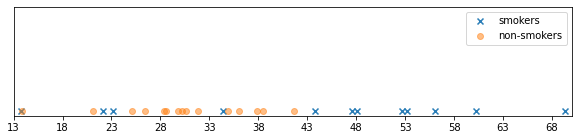

In [29]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

ax.scatter(smokers_data_set, datasets_dots_y[0], marker='x', alpha=0.95, label="smokers")
ax.scatter(nonsmokers_data_set, datasets_dots_y[1], marker='o', alpha=0.5, label="non-smokers")
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_ticks(np.arange(x_min, x_max, 5))
ax.legend()
ax.grid(False)
fig.set_size_inches(10, 2)
plt.show()

Thus, non-smokers tend to require less time to get asleep, and also, the sample standard deviation is smaller, which suggests that the time that smokers need to get asleep is more variable.

## Exercise 1.18

The following scores represent the final examination grades for a given course:

```
23 60 79 32 57 74 52 70 82
36 80 77 81 95 41 65 92 85
55 76 52 10 64 75 78 25 80
98 81 67 41 71 83 54 64 72
88 62 74 43 60 78 89 76 84
48 84 90 15 79 34 67 17 82
69 74 63 80 85 61
```

1. Construct a stem-and-leaf plot for the examination grades, in which the stems are 1, 2, 3,..., 9.
2. Construct a relative frequency histogram, draw the graph of the distrubution and discuss the skewness of the distribution.
3. Compute the sample mean, sample median, and sample standard deviation.

Let's start with the stem-and-leaf plot (which is actually a tabular report), following the same approach we followed in the concepts section:

In [30]:
data_set = [
23, 60, 79, 32, 57, 74, 52, 70, 82,
36, 80, 77, 81, 95, 41, 65, 92, 85,
55, 76, 52, 10, 64, 75, 78, 25, 80,
98, 81, 67, 41, 71, 83, 54, 64, 72,
88, 62, 74, 43, 60, 78, 89, 76, 84,
48, 84, 90, 15, 79, 34, 67, 17, 82,
69, 74, 63, 80, 85, 61]

# we split the dataset into the first and second digit
# - the first digit will be used for stems, the second for the leaves

stems = sorted(list(set([score // 10 for score in data_set])))

stem_and_leaf = { stem: ('', 0) for stem in stems}
for score in data_set:
    stem, leaf = (score // 10, score % 10)
    existing_leaf, existing_freq = stem_and_leaf[stem]
    stem_and_leaf[stem] = (existing_leaf + str(leaf), existing_freq + 1)

print(stem_and_leaf)

{1: ('057', 3), 2: ('35', 2), 3: ('264', 3), 4: ('1138', 4), 5: ('72524', 5), 6: ('05474207931', 11), 7: ('94076581248694', 14), 8: ('20150138944205', 14), 9: ('5280', 4)}


Now we clean the leaves a little bit, as it is customary to show them sorted by value:

In [31]:
def get_sorted_leaf(str):
    sorted_str = ''.join(sorted(str))
    return sorted_str

for stem in stem_and_leaf:
    leaf, freq = stem_and_leaf[stem]
    stem_and_leaf[stem] = (get_sorted_leaf(leaf), freq)

print(stem_and_leaf)

{1: ('057', 3), 2: ('35', 2), 3: ('246', 3), 4: ('1138', 4), 5: ('22457', 5), 6: ('00123445779', 11), 7: ('01244456678899', 14), 8: ('00011223445589', 14), 9: ('0258', 4)}


Finally, we accommodate on a pandas dataframe for pretty printing it, and add another column for the relative frequency.

In [32]:
import pandas as pd

stem_and_leaf_df = pd.DataFrame({
    "Stems":[stem for stem in stem_and_leaf], 
    "Leaf":[stem_and_leaf[stem][0] for stem in stem_and_leaf],
    "Frequency":[stem_and_leaf[stem][1] for stem in stem_and_leaf],
    "Relative Frequency": [round(stem_and_leaf[stem][1]/len(data_set), 2) for stem in stem_and_leaf]
    })

stem_and_leaf_df

,Stems,Leaf,Frequency,Relative Frequency
0,1,057,3,0.05
1,2,35,2,0.03
2,3,246,3,0.05
3,4,1138,4,0.07
4,5,22457,5,0.08
5,6,00123445779,11,0.18
6,7,01244456678899,14,0.23
7,8,00011223445589,14,0.23
8,9,0258,4,0.07


To draw it, as we have calculated the relative frequency and the bins, we will use a bar chart using as a measure the relative frequency.

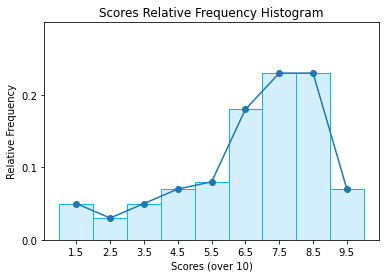

In [33]:
import matplotlib.pyplot as plt
import numpy as np

x_left_edges = [n for n in range(1,10)]
y_heights = stem_and_leaf_df['Relative Frequency'].tolist()

plt.bar(x_left_edges, y_heights, align='edge', width=1, color='#D4EFFC', edgecolor='#15B4F0')
plt.xlabel('Scores (over 10)')
plt.ylabel('Relative Frequency')
plt.title('Scores Relative Frequency Histogram')
plt.xticks([x + 0.5 for x in x_left_edges])
plt.yticks(np.arange(0, 0.3, 0.1))
plt.ylim([0, 0.3])

plt.scatter([x + 0.5 for x in x_left_edges], y_heights)
plt.plot([x + 0.5 for x in x_left_edges], y_heights)

plt.grid(False)


Note how it resembles a normal distribution skewed to the right.

Now the sample mean, median and standard deviation:

In [34]:
from libs.stats import get_stats

get_stats(data_set)

{'mean': 65.48333333333333,
 'median': 71.5,
 'variance': 446.62683615819213,
 'std_dev': 21.133547647240682,
 'range': 88}

## Exercise 1.19

The following data represents the length of life in years of 30 similar fuel pumps:

```
2.0 3.0 0.3 3.3 1.3 0.4
0.2 6.0 5.5 6.5 0.2 2.3
1.5 4.0 5.9 1.8 4.7 0.7
4.5 0.3 1.5 0.5 2.5 5.0
1.0 6.0 5.6 6.0 1.2 0.2
```

1. Construct a stem-and-leaf plot for the life in years, using the digit to the left of the decimal point as the stem for each observation.
2. Set up a relative frequency distribution.
3. Compute the sample mean, sample range, and sample standard deviation.

Let's start with the stem-and-leaf plot:

In [35]:
from math import floor

data_set=[
 2.0, 3.0, 0.3, 3.3, 1.3, 0.4,
 0.2, 6.0, 5.5, 6.5, 0.2, 2.3,
 1.5, 4.0, 5.9, 1.8, 4.7, 0.7,
 4.5, 0.3, 1.5, 0.5, 2.5, 5.0,
 1.0, 6.0, 5.6, 6.0, 1.2, 0.2]

# we split the dataset into the first and second digit, the first one used
# for the stems

whole_parts = [floor(x) for x in data_set]
frac_parts = [floor(round((x % 1) * 10, 0)) for x in data_set]

stems = sorted(list(set(whole_parts)))

# now we create the stem_and_leaf dictionary
stem_and_leaf = { stem:('', 0) for stem in stems }

for data_point in zip(whole_parts, frac_parts):
    stem, leaf = data_point
    existing_leaf, existing_freq = stem_and_leaf[stem]
    stem_and_leaf[stem] = (existing_leaf + str(leaf), existing_freq + 1)

# now we sort the leaves as it is customary
def get_sorted_leaf(str):
    sorted_str = ''.join(sorted(str))
    return sorted_str

for stem in stem_and_leaf:
    leaf, freq = stem_and_leaf[stem]
    stem_and_leaf[stem] = (get_sorted_leaf(leaf), freq)

stem_and_leaf


{0: ('22233457', 8),
 1: ('023558', 6),
 2: ('035', 3),
 3: ('03', 2),
 4: ('057', 3),
 5: ('0569', 4),
 6: ('0005', 4)}

Finally, we put the info in a pandas data frame to visualize it. In the same shot we add an additional column for the relative frequency:

In [36]:
import pandas as pd

data_set_len = len(data_set)

stem_and_leaf_df = pd.DataFrame({
    'Stem': [stem for stem in stem_and_leaf],
    'Leaf': [stem_and_leaf[stem][0] for stem in stem_and_leaf],
    'Frequency': [stem_and_leaf[stem][1] for stem in stem_and_leaf],
    'Relative Frequency': [round(stem_and_leaf[stem][1] / data_set_len, 2) for stem in stem_and_leaf]
})

stem_and_leaf_df

,Stem,Leaf,Frequency,Relative Frequency
0,0,22233457,8,0.27
1,1,023558,6,0.20
2,2,035,3,0.10
3,3,03,2,0.07
4,4,057,3,0.10
5,5,0569,4,0.13
6,6,0005,4,0.13


Now we compute the mean, range and sample standard deviation:

In [37]:
from libs.stats import get_stats

get_stats(data_set)

{'mean': 2.796666666666667,
 'median': 2.15,
 'variance': 4.961022988505748,
 'std_dev': 2.2273354009905533,
 'range': 6.3}

## Exercise 1.20

The following data represents the length of life in seconds of 50 fruit flies subject to a new spray in a controlled laboratory experiment:

```
17 20 10 9 23 13 12 19 18 24
12 14 6 9 13 6 7 10 13 7
16 18 8 13 3 32 9 7 10 11
13 7 18 7 10 4 27 19 16 8
7 10 5 14 15 10 9 6 7 15
```

1. Construct a double-stem-and-leaf plot for the life span of the fruit flies using the stems 0★, 0•, 1★, 1•, 2★, 2•, and 3★, such that stems coded by the symbols ★ and • are associated, respectively, with leaves 0 through 4 and 5 through 9.
2. Set up the relative frequency distribution.
3. Construct a relative frequency histogram.
4. Find the median.

Let's start with the double-stem-and-leaf plot:

In [38]:
from math import floor
import pandas as pd

data_set = [
    17, 20, 10, 9, 23, 13, 12, 19, 18, 24,
    12, 14, 6, 9, 13, 6, 7, 10, 13, 7,
    16, 18, 8, 13, 3, 32, 9, 7, 10, 11,
    13, 7, 18, 7, 10, 4, 27, 19, 16, 8,
    7, 10, 5, 14, 15, 10, 9, 6, 7, 15]

first_digits = [x // 10 for x in data_set]
second_digits = [x % 10 for x in data_set]

single_stems = sorted(list(set(first_digits)))
stems = []
for stem in single_stems:
    stems.append(str(stem) + '★')
    stems.append(str(stem) + '•')

# Now we create the stem-and-leaf structure as a dictionary
#   key  : stem
#   value: (leaf, freq)

stem_and_leaf = { stem:('', 0) for stem in stems }

for first_digit, second_digit in zip(first_digits, second_digits):    
    existing_leaf, existing_freq = stem_and_leaf[str(first_digit) + '★' if second_digit < 5 else str(first_digit) + '•']
    stem_and_leaf[str(first_digit) + '★' if second_digit < 5 else str(first_digit) + '•'] = (existing_leaf + str(second_digit), existing_freq + 1)

# now we sort the leaves as it is customary
def get_sorted_leaf(str):
    sorted_str = ''.join(sorted(str))
    return sorted_str

for stem in stem_and_leaf:
    leaf, freq = stem_and_leaf[stem]
    stem_and_leaf[stem] = (get_sorted_leaf(leaf), freq)

# We can remove '3•' as there is no data
del stem_and_leaf['3•']

data_set_len = len(data_set)

stem_and_leaf_df = pd.DataFrame({
    "Stem": [stem for stem in stem_and_leaf], 
    "Leaf": [stem_and_leaf[stem][0] for stem in stem_and_leaf],
    "Frequency": [stem_and_leaf[stem][1] for stem in stem_and_leaf],
    "Relative Frequency": [stem_and_leaf[stem][1] / data_set_len for stem in stem_and_leaf]
})

stem_and_leaf_df

,Stem,Leaf,Frequency,Relative Frequency
0,0★,34,2,0.04
1,0•,56667777777889999,17,0.34
2,1★,0000001223333344,16,0.32
3,1•,5566788899,10,0.20
4,2★,034,3,0.06
5,2•,7,1,0.02
6,3★,2,1,0.02


With answers to (1) and (2) in place we can proceed to visualize the histogram. As we have alredy calculated all the data, we can plot the histogram as a barchart.

It is customary when plotting a histogram to build a table with the following information:
+ Class Interval
+ Class Midpoint
+ Frequency
+ Relative Frequency

That table is commonly known as the *relative frequency distribution table*:

In [39]:
import numpy as np

rel_freq_distrib_df = pd.DataFrame({
    'Class Interval': [f'{interval_init}-{interval_init + 4}' for interval_init in np.arange(0, 35, 5)],
    'Class Midpoint': [interval_init + 2 for interval_init in np.arange(0, 35, 5)],
    'Frequency': stem_and_leaf_df['Frequency'],
    'Relative Frequency': stem_and_leaf_df['Relative Frequency']
})

rel_freq_distrib_df

,Class Interval,Class Midpoint,Frequency,Relative Frequency
0,0-4,2,2,0.04
1,5-9,7,17,0.34
2,10-14,12,16,0.32
3,15-19,17,10,0.20
4,20-24,22,3,0.06
5,25-29,27,1,0.02
6,30-34,32,1,0.02


With the table in place, let's visualize the histogram:

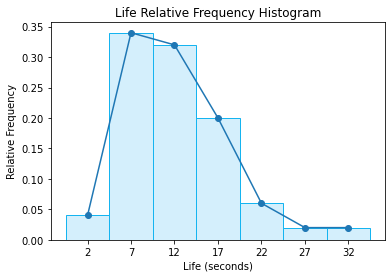

In [40]:
import matplotlib.pyplot as plt
import numpy as np

x_midpoints = rel_freq_distrib_df['Class Midpoint']
y_heights = rel_freq_distrib_df['Relative Frequency']

plt.bar(x_midpoints, y_heights, align='center', width=5, color='#D4EFFC', edgecolor='#15B4F0')
plt.xlabel('Life (seconds)')
plt.ylabel('Relative Frequency')
plt.title('Life Relative Frequency Histogram')
plt.xticks(x_midpoints)

plt.scatter(x_midpoints, y_heights)
plt.plot(x_midpoints, y_heights)

plt.show()

We see that the histogram looks like a normal distribution skewed to the left.

Finally, we compute the median:

In [41]:
from libs.stats import sample_median

print(f'sample median={sample_median(data_set)}')

sample median=10.5


## Exercise 1.21

The lengths of power failures in minutes are recorded in the following table:

```
22 18 135 15 90 78 69 98 102
83 55 28 121 120 13 22 124 112
70 66 74 89 103 24 21 112 21
40 98 87 132 115 21 28 43 37
50 96 118 158 74 78 83 93 95
```

1. Find the sample mean and sample median of the power failure times.
2. Find the sample standard deviation of the power failure times.

In [42]:
from libs.stats import get_stats

spc_separated_data = '22 18 135 15 90 78 69 98 102 83 55 28 121 120 13 22 124 112 70 66 74 89 103 24 21 112 21 40 98 87 132 115 21 28 43 37 50 96 118 158 74 78 83 93 95'

data_set = [int(str_val) for str_val in spc_separated_data.split(' ')]

get_stats(data_set)

{'mean': 74.02222222222223,
 'median': 78,
 'variance': 1541.1585858585859,
 'std_dev': 39.25759271604139,
 'range': 145}

## Exercise 1.22

The following data are the measures of the diameters of 36 rivet heads in 1/100 of an inch:

```
6.72 6.77 6.82 6.70 6.78 6.70 6.62 6.75
6.66 6.66 6.64 6.76 6.73 6.80 6.72 6.76
6.76 6.68 6.66 6.62 6.72 6.76 6.70 6.78
6.76 6.67 6.70 6.72 6.74 6.81 6.79 6.78
6.66 6.76 6.76 6.72
```

1. Find the sample mean and sample standard deviation
2. Construct the relative frequency histogram of the data
3. Comment on whether or not there is a ny clear indication that the sample came from a population that has a bell-shaped distribution.

In [43]:
from libs.stats import sample_mean, sample_standard_deviation

data_set = [
6.72, 6.77, 6.82, 6.70, 6.78, 6.70, 6.62, 6.75,
6.66, 6.66, 6.64, 6.76, 6.73, 6.80, 6.72, 6.76,
6.76, 6.68, 6.66, 6.62, 6.72, 6.76, 6.70, 6.78,
6.76, 6.67, 6.70, 6.72, 6.74, 6.81, 6.79, 6.78,
6.66, 6.76, 6.76, 6.72]

print(f'sample mean={round(sample_mean(data_set), 4)}')
print(f'sample std dev={round(sample_standard_deviation(data_set), 4)}')



sample mean=6.7261
sample std dev=0.0536


Let's build now the relative frequency distribution of the data. We will start assuming a bin for each data point:

In [44]:
import pandas as pd

sorted_data_points = sorted(list(set(data_set)))


freq_map = {data_point:0 for data_point in sorted_data_points}

for data_point in data_set:
    freq_map[data_point] = freq_map[data_point] + 1

dataset_len = len(data_set)
rel_freq_df = pd.DataFrame({
    'Value': sorted_data_points,
    'Frequency': [freq_map[data_point] for data_point in freq_map],
    'Relative Frequency': [freq_map[data_point] / data_set_len for data_point in freq_map]
})

rel_freq_df

,Value,Frequency,Relative Frequency
0,6.62,2,0.04
1,6.64,1,0.02
2,6.66,4,0.08
3,6.67,1,0.02
4,6.68,1,0.02
5,6.70,4,0.08
6,6.72,5,0.10
7,6.73,1,0.02
8,6.74,1,0.02
9,6.75,1,0.02


We see that we have a lot of bins, so it'll be better to reduce the number of bins to be able to gather visual feedback in an easier way.

Let's plot it with 6 bins, which means we need to group the data in 6 intervals:

In [45]:
from libs.stats import sample_range

print(f'min data point: {min(sorted_data_points)}')
print(f'max data point: {max(sorted_data_points)}')
print(f'range={round(sample_range(data_set), 2)}')


min data point: 6.62
max data point: 6.82
range=0.2


Now, we can compute the intervals for the bins:

In [46]:
np.linspace(6.62, 6.82, num=6)
start_intervals = np.linspace(6.62, 6.82, num=6)
end_intervals = [start_point + 0.04 for start_point in start_intervals]

freq_map = {data_point:0 for data_point in start_intervals}

for data_point in data_set:
    for start_point, end_point in zip(start_intervals, end_intervals):
        if data_point >= start_point and data_point < end_point:
            freq_map[start_point] = freq_map[start_point] + 1
            break
        elif data_point == 6.86:
            freq_map[6.82] = freq_map[6.82] + 1
            break

rel_freq_distrib_df = pd.DataFrame({
    'Class Interval': [f'{start_point}-{end_point}' for start_point, end_point in zip(start_intervals, end_intervals)],
    'Class Midpoint': [start + 0.02 for start in start_intervals],
    'Frequency': [freq_map[data_point] for data_point in freq_map],
    'Relative Frequency': [freq_map[data_point] / data_set_len for data_point in freq_map]
})

rel_freq_distrib_df


,Class Interval,Class Midpoint,Frequency,Relative Frequency
0,6.62-6.66,6.64,3,0.06
1,6.66-6.7,6.68,6,0.12
2,6.7-6.74,6.72,10,0.20
3,6.74-6.78,6.76,10,0.20
4,6.78-6.82,6.80,6,0.12
5,6.82-6.86,6.84,1,0.02


Now we can do a quick plot of the corresponding bar plot to visualize the histogram:

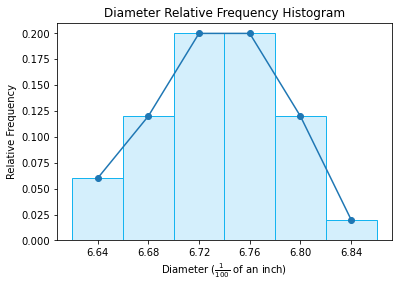

In [47]:
import matplotlib.pyplot as plt
import numpy as np

x_midpoints = rel_freq_distrib_df['Class Midpoint']
y_heights = rel_freq_distrib_df['Relative Frequency']

plt.bar(x_midpoints, y_heights, align='center', width=0.04, color='#D4EFFC', edgecolor='#15B4F0')
plt.xlabel(r'Diameter ($\frac{1}{100}$ of an inch)')
plt.ylabel('Relative Frequency')
plt.title('Diameter Relative Frequency Histogram')
plt.xticks(x_midpoints)

plt.scatter(x_midpoints, y_heights)
plt.plot(x_midpoints, y_heights)

plt.show()

So yes, it looks like a bell distribution a bit skewed to the left.

## Exercise 1.23

The hydrocarbon emissions at idling speed in parts per million (ppm) for automobiles of 1980 and 1990 model years are given for 20 randomly selected cars:

| Class | hydrocarbon emissions (ppm) |
| :---- | :-------------------------- |
| 1980 models | 141 359 247 940 882 494 306 210 105 880 200 223 188 940 241 190 300 435 241 380 |
| 1990 models | 140 160 20 20 223 60 20 95 360 70 220 400 217 58 235 380 200 175 85 65 |

1. Construct a dot plot.
2. Compute the sample means for the two years and superimpose the two means on the plots.
3. Comment on what the dot plot indicates regarding whether or not the population of emissions changed from 1980 to 1990. Use the concept of variability in your comments.

Let's start by building a dot plot with both data sets.

We first define the datasets:

In [48]:
models_1980_data_set = [141, 359, 247, 940, 882, 494, 306, 210, 105, 880, 200, 223, 188, 940, 241, 190, 300, 435, 241, 380]
models_1990_data_set = [140, 160, 20, 20, 223, 60, 20, 95, 360, 70, 220, 400, 217, 58, 235, 380, 200, 175, 85, 65]

data_sets = [models_1980_data_set, models_1990_data_set]


The next is to get some feeling about the min and max values found in the data sets:

In [49]:
def get_limits(*data_sets):
    mins = [min(data_set) for data_set in data_sets]
    maxs = [max(data_set) for data_set in data_sets]
    return (min(mins), max(maxs))

print(get_limits(*data_sets))

(20, 940)


Now we can define some proper limits for our plot in the x-axis such as 10, 950:

In [50]:
x_min = 0
x_max = 950

Now, we calculate the y-axis coordinates for the data. Mathematically, all dots will be in y = 0, but that makes for a pretty poor visualization. It is much better to pull up the coordinates where two dots have the same x coordinate as one already seen.

That is what `get_ys_for_dot_plot()` does:

In [51]:
def get_ys_for_dot_plot(*xs, skew=0.25):
    freq_map = {}
    ys = []
    for x in xs:
        y = []
        for value in x:
            if value in freq_map:
                freq_map[value] = freq_map[value] + skew
            else:
                freq_map[value] = 0
            y.append(freq_map[value])
        ys.append(y)
    return ys

datasets_dots_y = get_ys_for_dot_plot(*data_sets)

datasets_dots_y

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.25, 0, 0, 0, 0, 0.25, 0],
 [0, 0, 0, 0.25, 0.25, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0.25, 0.25, 0, 0, 0]]

Now, we define the y-axis limits for proper visualization:

In [52]:
y_min = -0.1
y_max = 2

Now we can proceed with the actual dot plot:

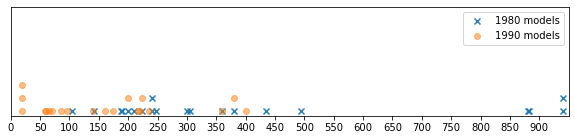

In [53]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

ax.scatter(data_sets[0], datasets_dots_y[0], marker='x', alpha=0.95, label="1980 models")
ax.scatter(data_sets[1], datasets_dots_y[1], marker='o', alpha=0.5, label="1990 models")
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_ticks(np.arange(x_min, x_max, 50))
ax.legend()
ax.grid(False)
fig.set_size_inches(10, 2)
plt.show()

Now, for (2) we compute the sample mean and superimpose it in the previous dot plot:

In [54]:
from libs.stats import sample_mean

print('==== 1980 models')
print(f'sample mean={sample_mean(data_sets[0])}')
print('\n==== 1990 models')
print(f'sample mean={sample_mean(data_sets[1])}')

==== 1980 models
sample mean=395.1

==== 1990 models
sample mean=160.15


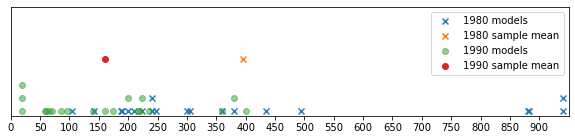

In [55]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

ax.scatter(data_sets[0], datasets_dots_y[0], marker='x', alpha=0.95, label="1980 models")
ax.scatter(sample_mean(data_sets[0]), 1, marker='x', label="1980 sample mean")

ax.scatter(data_sets[1], datasets_dots_y[1], marker='o', alpha=0.5, label="1990 models")
ax.scatter(sample_mean(data_sets[1]), 1, marker='o', label="1990 sample mean")

ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_ticks(np.arange(x_min, x_max, 50))
ax.legend()
ax.grid(False)
fig.set_size_inches(10, 2)
plt.show()

Thus, we can conclude that the emissions in 1990 models is much lower, and also less variable than the one found in 1980 models. Also, we don't see large emissions in 1990 models.

## Exercise 1.24

The following are historical data on staff salaries (dollars per pupil) for 30 schools sampled in the eastern part of USA in the early 1970s.

```
3.79 2.99 2.77 2.91 3.10 1.84 2.52 3.22
2.45 2.14 2.67 2.52 2.71 2.75 3.57 3.85
3.36 2.05 2.89 2.83 3.13 2.44 2.10 3.71
3.14 3.54 2.37 2.68 3.51 3.37
```

1. Compute the sample mean and sample standard deviation.
2. Construct a relative frequency histogram of the data.
3. Construct a stem-and-leaf display of the data.

In [56]:
from libs.stats import sample_mean, sample_standard_deviation

data_set = [
    3.79, 2.99, 2.77, 2.91, 3.10, 1.84, 2.52, 3.22,
    2.45, 2.14, 2.67, 2.52, 2.71, 2.75, 3.57, 3.85,
    3.36, 2.05, 2.89, 2.83, 3.13, 2.44, 2.10, 3.71,
    3.14, 3.54, 2.37, 2.68, 3.51, 3.37
]

print(f'sample mean={sample_mean(data_set)}')
print(f'sample standard deviation={sample_standard_deviation(data_set)}')

sample mean=2.897333333333334
sample standard deviation=0.5415172384515841


Let's plan for the stem-and-leaf table. Let's see the best way to decide the stems:

In [57]:
print(f'max value in data set: {max(data_set)}')
print(f'min value in data set: {min(data_set)}')

max value in data set: 3.85
min value in data set: 1.84


It seems that a single stem plot considering only 1, 2, 3 for the stem won't be enough, but it we consider a double stem-and-leaf plot we will have 5 bins, which seems OK:

+ 15-19 &mdash; 1•
+ 20-24 &mdash; 2★
+ 25-29 &mdash; 2•
+ 30-34 &mdash; 3★
+ 35-39 &mdash; 3•


In [58]:
from math import floor
import pandas as pd

first_digits = [floor(x * 10) for x in data_set]
second_digits = [floor(round(((x * 10) % 1) * 10, 1)) for x in data_set]

stems = ['1•', '2★', '2•', '3★', '3•']
stem_and_leaf = { stem:('', 0) for stem in stems}

for first_digit, second_digit in zip(first_digits, second_digits):
    if first_digit < 20:
        stem = '1•'
    elif first_digit < 25:
        stem = '2★'
    elif first_digit < 30:
        stem = '2•'
    elif first_digit < 35:
        stem = '3★'
    else:
        stem = '3•'

    existing_leaf, existing_freq = stem_and_leaf[stem]
    stem_and_leaf[stem] = (existing_leaf + str(second_digit), existing_freq + 1)

data_set_len = len(data_set)

stem_and_leaf_df = pd.DataFrame({
    'Class Interval': [f'{init / 10}-{(init + 4) / 10}' for init in range(15, 40, 5)],
    'Class Midpoint': [(init + 2) / 10 for init in range(15, 40, 5)],
    'Stem': [stem for stem in stem_and_leaf],
    'Leaf': [stem_and_leaf[stem][0] for stem in stem_and_leaf],
    'Frequency': [stem_and_leaf[stem][1] for stem in stem_and_leaf],
    'Relative Frequency': [stem_and_leaf[stem][1] / data_set_len for stem in stem_and_leaf]
})

stem_and_leaf_df


,Class Interval,Class Midpoint,Stem,Leaf,Frequency,Relative Frequency
0,1.5-1.9,1.7,1•,4,1,0.033333
1,2.0-2.4,2.2,2★,545407,6,0.200000
2,2.5-2.9,2.7,2•,97127215938,11,0.366667
3,3.0-3.4,3.2,3★,026347,6,0.200000
4,3.5-3.9,3.7,3•,975141,6,0.200000


With all the data in place in the data frame (in which we have both the relative frequency table and the stem-and-leaf cell) we can plot the histogram as a bar chart:

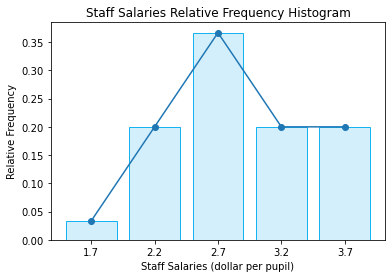

In [59]:
import matplotlib.pyplot as plt
import numpy as np

x_midpoints = stem_and_leaf_df['Class Midpoint']
y_heights = stem_and_leaf_df['Relative Frequency']

plt.bar(x_midpoints, y_heights, align='center', width=0.4, color='#D4EFFC', edgecolor='#15B4F0')
plt.xlabel('Staff Salaries (dollar per pupil)')
plt.ylabel('Relative Frequency')
plt.title('Staff Salaries Relative Frequency Histogram')
plt.xticks(x_midpoints)

plt.scatter(x_midpoints, y_heights)
plt.plot(x_midpoints, y_heights)

plt.show()

## Exercise 1.25

The following data set is related to the previous exercise, and gives the percentages of the families that are in the upper income level, for the same individual schools in the same order as in [Exercise 1.24](#exercise-124):

```
72.2 31.9 26.5 29.1 27.3 8.6 22.3 26.5
20.4 12.8 25.1 19.2 24.1 58.2 68.1 89.2
55.1 9.4 14.5 13.9 20.7 17.9 8.5 55.4
38.1 54.2 21.5 26.2 59.1 43.3
```

1. Calculate the sample mean
2. Calculate the sample median
3. Construct a relative frequency histogram of the data
4. Compute the 10% trimmed mean. Compare with the results of (1) and (2) and comment.

In [60]:
from libs.stats import sample_mean, sample_median

data_set = [
    72.2, 31.9, 26.5, 29.1, 27.3, 8.6, 22.3, 26.5,
    20.4, 12.8, 25.1, 19.2, 24.1, 58.2, 68.1, 89.2,
    55.1, 9.4, 14.5, 13.9, 20.7, 17.9, 8.5, 55.4,
    38.1, 54.2, 21.5, 26.2, 59.1, 43.3]

print(f'sample mean: {sample_mean(data_set)}')
print(f'sample median: {sample_median(data_set)}')

sample mean: 33.31000000000001
sample median: 26.35


Now we calculate the relative frequency histogram of the data.

The first step is to decide the number of bins, and to do that we need to investigate the range of the data:

In [61]:
print(f'min: {min(data_set)}')
print(f'max: {max(data_set)}')

min: 8.5
max: 89.2


As a result we can do the following ten class intervals:
+ bin 0 &mdash; 0-9
+ bin 1 &mdash; 10-19
+ bin 2 &mdash; 20-29
+ ...
+ bin 8 &mdash; 80-89 

Then, we will need to build the frequency map, going over the data and counting in which interval it is found:

In [62]:
from math import floor

freq_map = {f'bin {n}':0 for n in range(0, 9)}

for data_point in data_set:
    whole_part = floor(data_point)
    bin = whole_part // 10
    freq_map[f'bin {bin}'] = freq_map[f'bin {bin}'] + 1

Now, we put everything into a pandas data frame:

In [63]:
import pandas as pd

rel_freq_distrib_df = pd.DataFrame({
    'Class Interval': [f'[{n * 10}-{n * 10 + 10})' for n in range(0, 9)],
    'Class Midpoint': [n * 10 + 5 for n in range(0, 9)],
    'Frequency': [freq_map[freq] for freq in freq_map],
    'Relative Frequency': [round(freq_map[freq] / len(data_set), 2) for freq in freq_map]
})

rel_freq_distrib_df

,Class Interval,Class Midpoint,Frequency,Relative Frequency
0,[0-10),5,3,0.10
1,[10-20),15,5,0.17
2,[20-30),25,11,0.37
3,[30-40),35,2,0.07
4,[40-50),45,1,0.03
5,[50-60),55,5,0.17
6,[60-70),65,1,0.03
7,[70-80),75,1,0.03
8,[80-90),85,1,0.03


With this information in place, we can proceed to plot the histogram as a bar chart:

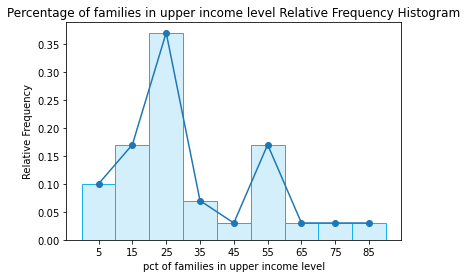

In [64]:
import matplotlib.pyplot as plt
import numpy as np

x_midpoints = rel_freq_distrib_df['Class Midpoint']
y_heights = rel_freq_distrib_df['Relative Frequency']

plt.bar(x_midpoints, y_heights, align='center', width=10, color='#D4EFFC', edgecolor='#15B4F0')
plt.xlabel('pct of families in upper income level')
plt.ylabel('Relative Frequency')
plt.title('Percentage of families in upper income level Relative Frequency Histogram')
plt.xticks(x_midpoints)

plt.scatter(x_midpoints, y_heights)
plt.plot(x_midpoints, y_heights)

plt.show()

Now, let's calculate the $ \bar{x}_{tr(10)} $

In [65]:
from libs.stats import trimmed_mean

print(f'trimmed mean(10%): {trimmed_mean(data_set, 10)}')

trimmed mean(10%): 30.970833333333335


The trimmed mean is in the middle of the median and sample mean. This gives us a better result than the mean, because the data is skewed to the right.

## Exercise 1.26

Suppose it is of interest to use the data sets in [Exercise 1.24](#exercise-124) and [Exercise 1.25](#exercise-125) to derive a model that would predict staff salaries as a function of percentage of families in a high income level for current school systems.

Comment on any disadvantage in carrying out this type of analysis.

There is a small amount of data in those data sets, and we also see that there are a few outliers that might influence the quality of the model.

## Exercise 1.27

A study is done to determine the influence of the wear, $ y $, of a bearing as a function of the load, $ x $, on the bearing. A designed experiment is used for this study. Three levels of load were used: 700 lb, 1000 lb, and 1300 lb. Four specimens were used at each level, and the sample means were respectively, 210, 235, and 375.

1. Plot average wear against load
2. From the plot in (1), does it appear as if a relationship exists between wear and load?
3. Suppose we look at the individual wear values for each of the four specimens at each load level (see the table below). Plot the wear results for all specimens agains the three load values.
4. From your plot in (3), does it appear as if a clear relationship exists? If your answer is different from that in (2), explain why.

| $ y $ | $ x = 700 $ | $ x = 1000 $ | $ x = 1300 $ |
| ---- | ---------- | ----------- | ----------- |
| $ y_1 $ | 145 | 250 | 150 |
| $ y_2 $ | 105 | 195 | 180 |
| $ y_3 $ | 260 | 375 | 420 |
| $ y_4 $ | 330 | 480 | 750 |


Let's start by plotting the wear agains the load as a scatter plot:

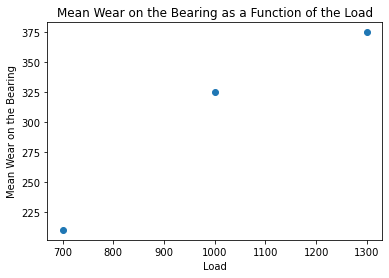

In [66]:
import matplotlib.pyplot as plt
import numpy as np

x_loads = [700, 1000, 1300]
y_mean_wears = [210, 325, 375]

plt.scatter(x_loads, y_mean_wears)
plt.xlabel('Load')
plt.ylabel('Mean Wear on the Bearing')
plt.title('Mean Wear on the Bearing as a Function of the Load')
plt.show()

From the plot above it seems that the load has an effect on the wear, with loads beyond 1000 lb having a dramatic effect on the wear.

Now, let's plot the detailed data of the four individual specimens:

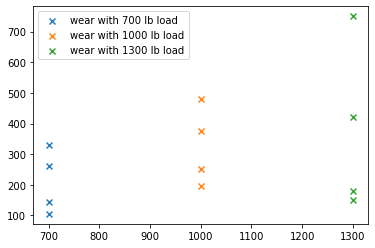

In [67]:
x_700 = [700 for _ in range(0, 4)]
y_700 = [145, 105, 260, 330]

x_1000 = [1000 for _ in range(0, 4)]
y_1000 = [250, 195, 375, 480]

x_1300 = [1300 for _ in range(0, 4)]
y_1300 = [150, 180, 420, 750]

fig, ax = plt.subplots()

ax.scatter(x_700, y_700, marker='x', alpha=0.95, label='wear with 700 lb load')
ax.scatter(x_1000, y_1000, marker='x', alpha=0.95, label='wear with 1000 lb load')
ax.scatter(x_1300, y_1300, marker='x', alpha=0.95, label='wear with 1300 lb load')

ax.legend()
plt.show()

With the plot we can conclude that the effect of the load on the wear of the bearing is not that extreme. The previous conclusion was derived based on the mean, but we see that the wear on the 1300 lb load has an outlier.

As a result, there is no such a strong connection between the wear and the load.

## Exercise 1.28

The following data sets show the results of a designed experiment in which injection velocity was held at two levels (low and high) to measure the shrinkage of molded parts.

| Injection Velocity | Shrinkage values ($ cm \times 10^4 $) |
| :----------------- | :------------------------------------ |
| Low | 72.68 72.62 72.58 72.48 73.07 72.55 72.42 72.84 72.58 72.92 |
| High | 71.62 71.68 71.74 71.48 71.55 71.52 71.71 71.56 71.70 71.50 |

1. Construct a dot plot of both data sets on the same graph. Indicate on the plot both shrinkage means.
2. Based on the graphical results in (1), using the location of the two means and your sense of variabilty, what do you conclude regarding the effect of injection velocity on shrinkage?


Let's start by defining the data sets and calculating the mean, as we will need it for the plots:

In [68]:
from libs.stats import sample_mean

low_ds = [72.68, 72.62, 72.58, 72.48, 73.07, 72.55, 72.42, 72.84, 72.58, 72.92]
high_ds = [71.62, 71.68, 71.74, 71.48, 71.55, 71.52, 71.71, 71.56, 71.70, 71.50]

data_sets = [low_ds, high_ds]

print('==== low injection velocity')
print(f'sample mean: {round(sample_mean(low_ds), 3)}')

print('\n==== low injection velocity')
print(f'sample mean: {round(sample_mean(high_ds), 3)}')

==== low injection velocity
sample mean: 72.674

==== low injection velocity
sample mean: 71.606


As always when doing dot plots, we need to manually find the limits and adjust the scale of the plot:

In [69]:
def get_limits(*data_sets):
    mins = [min(data_set) for data_set in data_sets]
    maxs = [max(data_set) for data_set in data_sets]
    return (min(mins), max(maxs))

print(get_limits(*data_sets))

(71.48, 73.07)


With this limits in place, it seems appropriate to select the limits on x-axis on 71.25, 73.25

In [70]:
x_min = 71.25
x_max = 73.25

Now, we have to calculate the y coordinates, which we do with our helper function below. This function will pull up the coordinates of clashing values:

In [71]:
def get_ys_for_dot_plot(*xs, skew=0.25):
    freq_map = {}
    ys = []
    for x in xs:
        y = []
        for value in x:
            if value in freq_map:
                freq_map[value] = freq_map[value] + skew
            else:
                freq_map[value] = 0
            y.append(freq_map[value])
        ys.append(y)
    return ys

data_sets_y = get_ys_for_dot_plot(*data_sets)

Now, we adjust the limits for the y-axis but examining the previous data:

In [72]:
print(get_limits(*data_sets_y))

(0, 0.25)


As there does not seem to be clashes we can do:
y_min = -0.1
y_max = 1

In [73]:
y_min = -0.1
y_max = 1

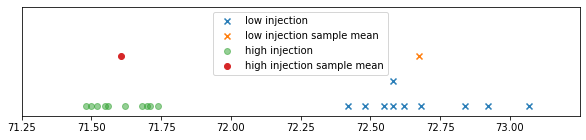

In [74]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

ax.scatter(data_sets[0], data_sets_y[0], marker='x', alpha=0.95, label="low injection")
ax.scatter(sample_mean(data_sets[0]), 0.5, marker='x', label="low injection sample mean")

ax.scatter(data_sets[1], data_sets_y[1], marker='o', alpha=0.5, label="high injection")
ax.scatter(sample_mean(data_sets[1]), 0.5, marker='o', label="high injection sample mean")

ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_ticks(np.arange(x_min, x_max, 0.25))
ax.legend()
ax.grid(False)
fig.set_size_inches(10, 2)
plt.show()

We can conclude that the shrinkage is less when using the high injection technique, and also the data is more concentrated around the mean. The data for high injection is more spread and the mean is higher.

## Exercise 1.29

Use the data in [Exercise 1.24](#exercise-124) to construct a box plot.

```
3.79 2.99 2.77 2.91 3.10 1.84 2.52 3.22
2.45 2.14 2.67 2.52 2.71 2.75 3.57 3.85
3.36 2.05 2.89 2.83 3.13 2.44 2.10 3.71
3.14 3.54 2.37 2.68 3.51 3.37
```

Matplot lib provides oob support for box-and-whisker plots and box plots.

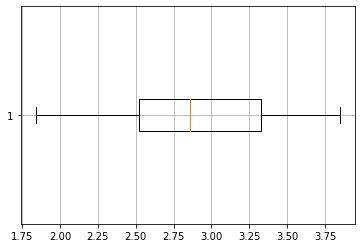

In [75]:
import matplotlib.pyplot as plt

data_set = [
    3.79, 2.99, 2.77, 2.91, 3.10, 1.84, 2.52, 3.22,
    2.45, 2.14, 2.67, 2.52, 2.71, 2.75, 3.57, 3.85,
    3.36, 2.05, 2.89, 2.83, 3.13, 2.44, 2.10, 3.71,
    3.14, 3.54, 2.37, 2.68, 3.51, 3.37
]

plt.boxplot(data_set, vert=False)
plt.grid(True)
plt.show()

We see that the sample data is relatively skewed to the right, with the median set between 2.75 and 3.0. There are no outliers in the data.

## Exercise 1.30

Below are the lifetimes, in hours, of 50 lamps, taken from forced life tests:

```
919 1196 785 1126 936 918
1156 920 948 1067 1092 1162
1170 929 950 905 972 1035
1045 855 1195 1195 1340 1122
938 970 1237 956 1102 1157
978 832 1009 1157 1151 1009
765 958 902 1022 1333 811
1217 1085 896 958 1311 1037
702 923
```

Construct a box plot for these data.

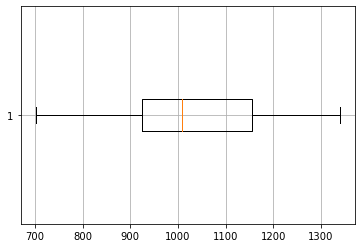

In [76]:
import matplotlib.pyplot as plt

str_data = '919 1196 785 1126 936 918 1156 920 948 1067 1092 1162 1170 929 950 905 972 1035 1045 855 1195 1195 1340 1122 938 970 1237 956 1102 1157 978 832 1009 1157 1151 1009 765 958 902 1022 1333 811 1217 1085 896 958 1311 1037 702 923'
data_set = [int(str_val) for str_val in str_data.split(' ')]

plt.boxplot(data_set, vert=False)
plt.grid(True)
plt.show()


The median is around 1000, with the sample a little bit skewed to the right (meaning that most of the sample are above 1000).

## Exercise 1.31

Consider the situation of [Exercise 1.28](#exercise-128), but now with new data sets in which shrinkage is measured under different temperature conditions, again at low injection and high injection velocity:

| Injection Velocity | Shrinkage |
| :----------------- | :-------- |
| Low | 76.20 76.09 75.98 76.15 76.17 75.94 76.12 76.18 76.25 75.82 |
| High | 93.25 93.19 92.87 93.29 93.37 92.98 93.47 93.75 93.89 91.62 |

1. Construct a dot plot with both data sets on the same graph and identify both means.
2. Comment on the influence of injection velocity. Take into account the position of the two means and the variability around each mean.
3. Compare the conclusion with the one found in [Exercise 1.28](#exercise-128). Would you say that there is an interaction between injection velocity and the temperature conditions?

Let's start with the dot plot.

This time we will use a minimalist approach, and let Matplotlib get some sensible defaults for us:
1. use a helper function to *skew* the y coordinate of dots whose x-coordinate clashes with other dots, but we won't adjust the y_min and y_max accordingly.
2. Print the data sets as scatter plots, as well as the mean for each data set.

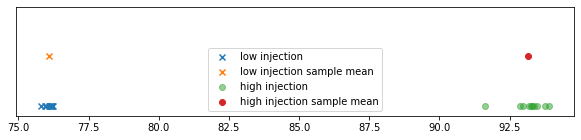

In [77]:
from tokenize import Number
import matplotlib.pyplot as plt
import numpy as np
from libs.stats import sample_mean

low_str_values = '76.20 76.09 75.98 76.15 76.17 75.94 76.12 76.18 76.25 75.82'
high_str_values = '93.25 93.19 92.87 93.29 93.37 92.98 93.47 93.75 93.89 91.62'
low_ds = [float(str_val) for str_val in low_str_values.split(' ')]
high_ds = [float(str_val) for str_val in high_str_values.split(' ')]

data_sets = [low_ds, high_ds]

def get_ys_for_dot_plot(*xs, skew=0.25):
    freq_map = {}
    ys = []
    for x in xs:
        y = []
        for value in x:
            if value in freq_map:
                freq_map[value] = freq_map[value] + skew
            else:
                freq_map[value] = 0
            y.append(freq_map[value])
        ys.append(y)
    return ys

data_sets_y = get_ys_for_dot_plot(*data_sets)


fig, ax = plt.subplots()

ax.scatter(data_sets[0], data_sets_y[0], marker='x', alpha=0.95, label="low injection")
ax.scatter(sample_mean(data_sets[0]), 0.25, marker='x', label="low injection sample mean")

ax.scatter(data_sets[1], data_sets_y[1], marker='o', alpha=0.5, label="high injection")
ax.scatter(sample_mean(data_sets[1]), 0.25, marker='o', label="high injection sample mean")

plt.ylim(-0.05, 0.5)

ax.get_yaxis().set_visible(False)
ax.legend()
ax.grid(False)
fig.set_size_inches(10, 2)
plt.show()


We see that low injection values have very small variability when compared to the one found for high injection technique. Also, the shrinkage is much less.

This is the opposite conclusion that we obtained for the [Exercise 1.28](#exercise-128), which means that temperature has a dramatic effect on the shrinkage.

## Exercise 1.32

Use the results from [Exercise 1.28](#exercise-128) and [Exercise 1.31](#exercise-131) to create a plot that illustrates the interaction evident from the data.

We can build the plot in different ways:
1. Drawing the temp on the x-axis and thus plotting lines between sample_mean_ht_li and sample_mean_lt_li, and sample_mean_ht_hi and sample_mean_lt_hi (two plots for low velocity and high velocity)
2. Drawing the velocity injection on the x-axis and thus plottling lines between sample_mean_ht_li and sample_mean_ht_hi, and between sample_mean_lt_li and sample_mean_lt_hi (two plots for high and low temp)

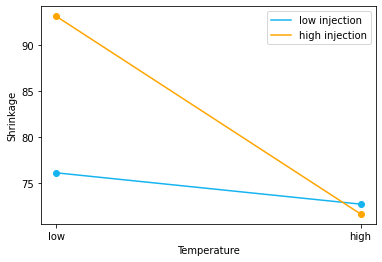

In [78]:
import matplotlib.pyplot as plt
from libs.stats import sample_mean

high_temp_low_injection_str_values = '76.20 76.09 75.98 76.15 76.17 75.94 76.12 76.18 76.25 75.82'
high_temp_high_injection_str_values = '93.25 93.19 92.87 93.29 93.37 92.98 93.47 93.75 93.89 91.62'
high_temp_low_injection_ds = [float(str_val) for str_val in high_temp_low_injection_str_values.split(' ')]
high_temp_high_injection_ds = [float(str_val) for str_val in high_temp_high_injection_str_values.split(' ')]

low_temp_low_injection_ds = [72.68, 72.62, 72.58, 72.48, 73.07, 72.55, 72.42, 72.84, 72.58, 72.92]
low_temp_high_injection_ds = [71.62, 71.68, 71.74, 71.48, 71.55, 71.52, 71.71, 71.56, 71.70, 71.50]

sample_mean_ht_li = sample_mean(high_temp_low_injection_ds)
sample_mean_ht_hi = sample_mean(high_temp_high_injection_ds)
sample_mean_lt_li = sample_mean(low_temp_low_injection_ds)
sample_mean_lt_hi = sample_mean(low_temp_high_injection_ds)

y_li = [sample_mean_ht_li, sample_mean_lt_li]
y_hi = [sample_mean_ht_hi, sample_mean_lt_hi]
x_t = [100, 200] # randomly selected, will map to labels 'low' and 'high'

plt.plot(x_t, y_li, color='#15B4F0', label='low injection')
plt.scatter(x_t, y_li, color='#15B4F0')

plt.plot(x_t, y_hi, color='orange', label='high injection')
plt.scatter(x_t, y_hi, color='orange')

plt.xlabel('Temperature')
plt.xticks(ticks=[100, 200], labels=['low', 'high'])
plt.ylabel('Shrinkage')

plt.legend()

plt.show()

We can read this plot as:
> when using low-injection technique, the temperature does not seem to affect so much in the shrinkage, while when using high injection it has a dramatic effect. Note that when using high-injection and high-temperature the shrinkage is lower than when using the low injection technique with high temperature.

Now, we can draw the velocity injection on the x-axis and see if it provides a better visualization.

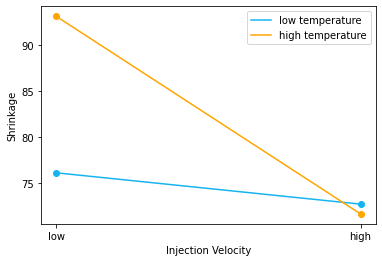

In [79]:
import matplotlib.pyplot as plt
from libs.stats import sample_mean

high_temp_low_injection_str_values = '76.20 76.09 75.98 76.15 76.17 75.94 76.12 76.18 76.25 75.82'
high_temp_high_injection_str_values = '93.25 93.19 92.87 93.29 93.37 92.98 93.47 93.75 93.89 91.62'
high_temp_low_injection_ds = [float(str_val) for str_val in high_temp_low_injection_str_values.split(' ')]
high_temp_high_injection_ds = [float(str_val) for str_val in high_temp_high_injection_str_values.split(' ')]

low_temp_low_injection_ds = [72.68, 72.62, 72.58, 72.48, 73.07, 72.55, 72.42, 72.84, 72.58, 72.92]
low_temp_high_injection_ds = [71.62, 71.68, 71.74, 71.48, 71.55, 71.52, 71.71, 71.56, 71.70, 71.50]

sample_mean_ht_li = sample_mean(high_temp_low_injection_ds)
sample_mean_ht_hi = sample_mean(high_temp_high_injection_ds)
sample_mean_lt_li = sample_mean(low_temp_low_injection_ds)
sample_mean_lt_hi = sample_mean(low_temp_high_injection_ds)

y_lt = [sample_mean_lt_li, sample_mean_lt_hi]
y_ht = [sample_mean_ht_li, sample_mean_ht_hi]
x_t = [100, 200] # randomly selected, will map to labels 'low' and 'high'

plt.plot(x_t, y_li, color='#15B4F0', label='low temperature')
plt.scatter(x_t, y_li, color='#15B4F0')

plt.plot(x_t, y_hi, color='orange', label='high temperature')
plt.scatter(x_t, y_hi, color='orange')

plt.xlabel('Injection Velocity')
plt.xticks(ticks=[100, 200], labels=['low', 'high'])
plt.ylabel('Shrinkage')

plt.legend()

plt.show()

We see that actually the plot is the same.